# To do

- [x] MSG to GEOS5 grid
- [x] MSG to AgERA5 grid
- [ ] MSG to ERA5 grid
- [ ] AgERA5 to GEOS5 grid
- [ ] AgERA5 to ERA5 grid
- [ ] GEOS5 to ERA5 grid

In [9]:
%run ..\Functions.ipynb

# Test

In [2]:
import xarray as xr

# Open the source and target NetCDF files
source_ds = xr.open_dataset(r"E:\WaPORQA\MSG\MDIDSSF\Processed\Daily\2018-01.nc",
                           engine = 'netcdf4')
target_ds = xr.open_dataset(r"E:\WaPORQA\GEOS5\Processed\Daily\2018-01.nc",
                           engine = 'netcdf4')


In [ ]:
source_ds

In [ ]:
source_ds

In [3]:
target_grid = target_ds.coords
target_grid

Coordinates:
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon      (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.06 64.38 64.69 65.0
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31

In [50]:
source_ds.coords

Coordinates:
  * lat      (lat) float32 40.0 39.95 39.9 39.85 ... -39.85 -39.9 -39.95 -40.0
  * lon      (lon) float32 -30.0 -29.95 -29.9 -29.85 ... 64.85 64.9 64.95 65.0
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31

In [53]:
sorted_ds = source_ds.sortby("lat", ascending=True)

In [54]:
sorted_ds.coords

Coordinates:
  * lat      (lat) float32 -40.0 -39.95 -39.9 -39.85 ... 39.85 39.9 39.95 40.0
  * lon      (lon) float32 -30.0 -29.95 -29.9 -29.85 ... 64.85 64.9 64.95 65.0
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31

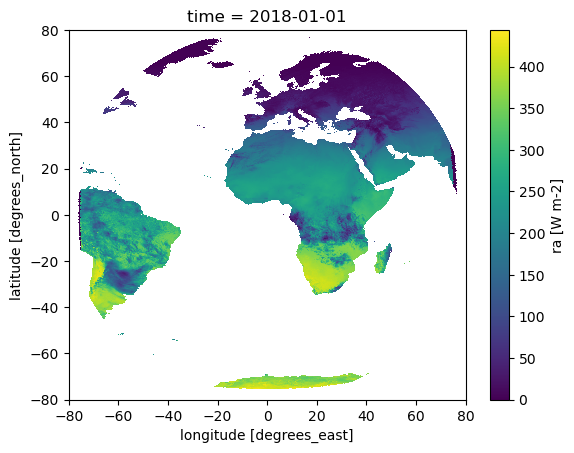

In [67]:
source_ds.ra[0].plot()

In [5]:
resampled_data = source_ds.interp_like(target_grid)
resampled_data

<xarray.Dataset>
Dimensions:  (time: 31, lat: 321, lon: 305)
Coordinates:
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.25 39.5 39.75 40.0
  * lon      (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.06 64.38 64.69 65.0
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31
Data variables:
    ra       (time, lat, lon) float64 nan nan nan nan ... 134.5 133.5 136.5

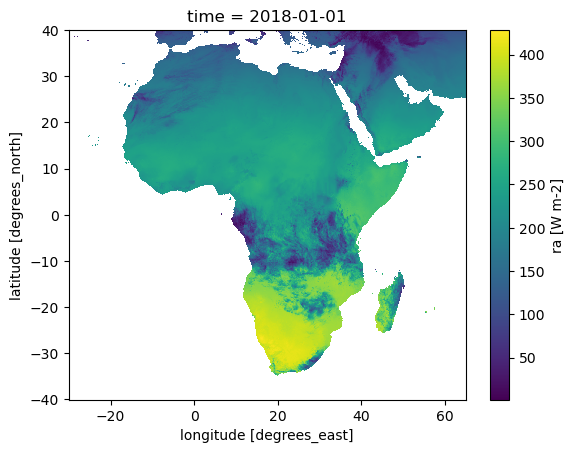

In [6]:
source_ds.ra[0].plot()

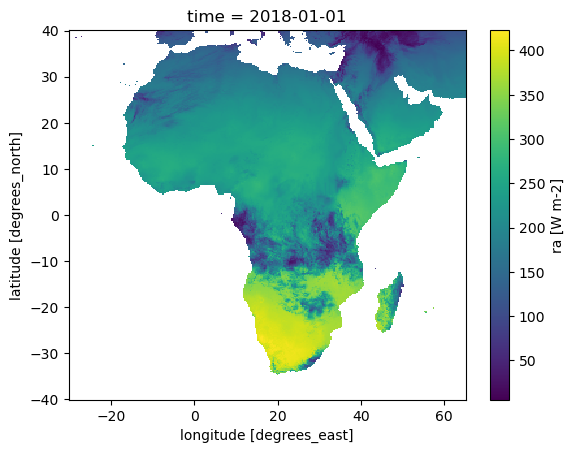

In [7]:
resampled_data.ra[0].plot()

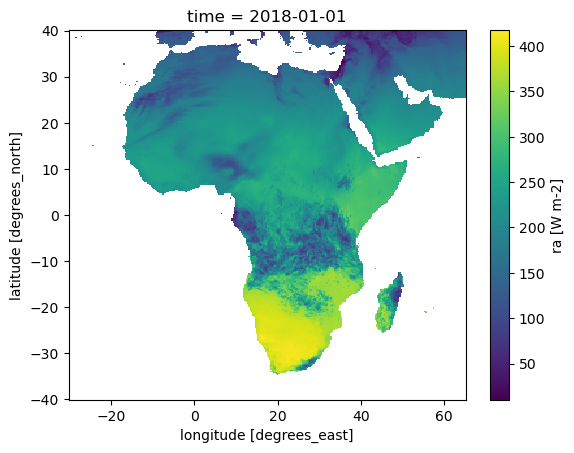

In [21]:
masked_target_ds.ra[0].plot()

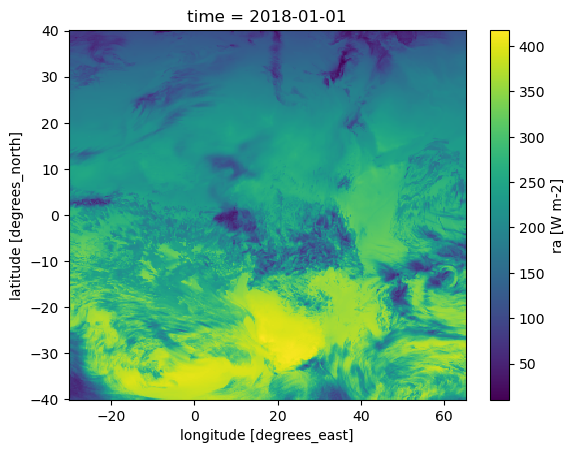

In [9]:
target_ds.ra[0].plot()

In [22]:
diff=resampled_data.ra[0]-source_ds.ra[0]

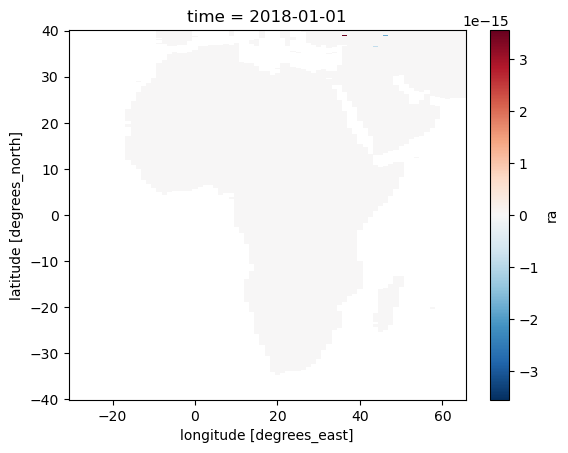

In [23]:
diff.plot() # difference between resampled MSG and original MSG

In [28]:
diff.sel(lon=0, lat=0, method='nearest')

<xarray.DataArray 'ra' ()>
array(nan)
Coordinates:
    lat      float64 0.0
    lon      float64 0.0
    time     datetime64[ns] 2018-01-01

In [19]:
masked_target_ds = target_ds.where (~resampled_data.isnull ())

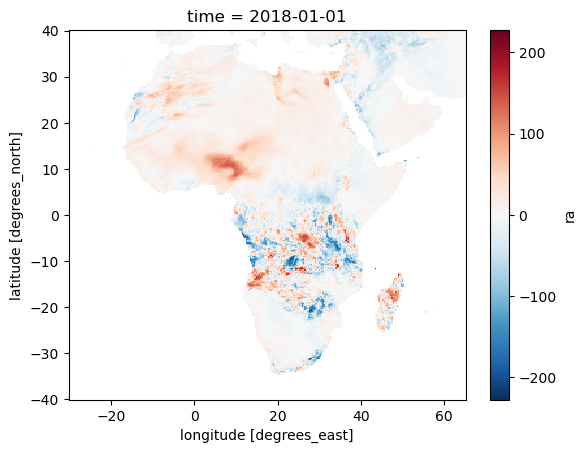

In [20]:
# Difference between GEOS5 and resampled MSG, linear
diff=resampled_data.ra[0]-masked_target_ds.ra[0]
diff.plot()

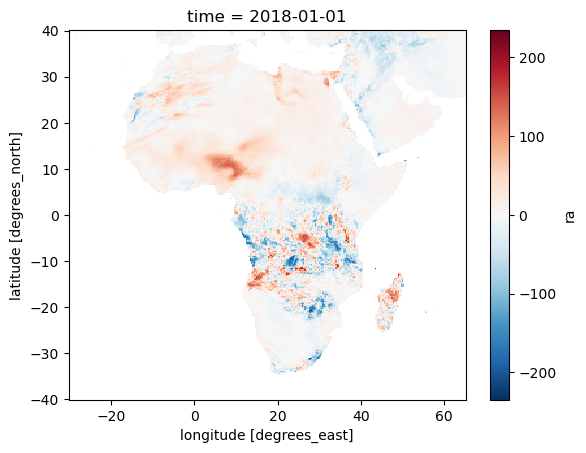

In [29]:
# Difference between GEOS5 and resampled MSG, nearest
resampled_data = source_ds.interp_like(target_grid, method='nearest')
diff=resampled_data.ra[0]-masked_target_ds.ra[0]
diff.plot() 

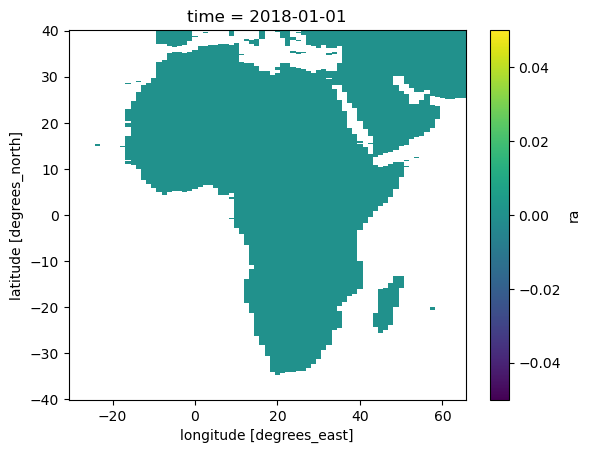

In [30]:
# Difference between MSG and resampled MSG, nearest
resampled_data = source_ds.interp_like(target_grid, method='nearest')
diff=resampled_data.ra[0]-source_ds.ra[0]
diff.plot() 

# MSG

## GEOS5 grid

In [2]:
folder_root = r"E:\WaPORQA\MSG\MDIDSSF\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\GEOS5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"GEOS5_Grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'GEOS5 grid',
                                   'input': fh
                                  }
                         )

## AgERA5 grid

In [10]:
folder_root = r"E:\WaPORQA\MSG\MDIDSSF\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\AgERA5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"AgERA5_grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'AgERA5 grid',
                                   'input': fh
                                  }
                         )

## ERA5 grid

In [11]:
folder_root = r"E:\WaPORQA\MSG\MDIDSSF\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"ERA5_grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'ERA5 grid',
                                   'input': fh
                                  }
                         )

# AgERA5

## GEOS5 grid

In [6]:
folder_root = r"E:\WaPORQA\AgERA5\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\GEOS5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"GEOS5_Grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'GEOS5 grid',
                                   'input': fh
                                  }
                         )

## ERA5 grid

In [12]:
folder_root = r"E:\WaPORQA\AgERA5\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"ERA5_Grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'ERA5 grid',
                                   'input': fh
                                  }
                         )

# GEOS5
## ERA5 grid

In [13]:
folder_root = r"E:\WaPORQA\GEOS5\Processed"
subfolders = ["Daily", "Monthly", "Yearly"]
target_nc = r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc"

for subfolder in subfolders:
    fhs = glob.glob(os.path.join(folder_root,subfolder,"*.nc"))
    save_folder = os.path.join(folder_root,subfolder,"ERA5_grid")
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for fh in fhs:
        save_nc = os.path.join(save_folder, os.path.basename(fh))
        spatial_aggregate(fh, target_nc, save_nc, 
                          attrs = {'resampling': 'ERA5 grid',
                                   'input': fh
                                  }
                         )